In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df = dataset
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
## independent and dependent features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [10]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [12]:
##  Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

### Feature selection based on correlation

<Axes: >

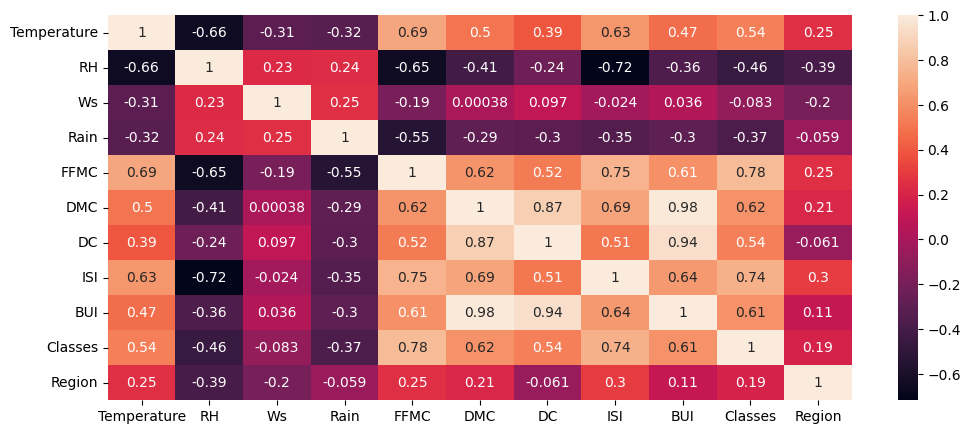

In [17]:
plt.figure(figsize=(12,5))
sns.heatmap(X_train.corr(),annot=True)

In [25]:
def correlation(dataset,threshold):
    colname = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname.add(corr_matrix.columns[i])

    return colname

In [26]:
corr_feature = correlation(X_train,0.85)
corr_feature

set()

In [27]:
## drop that features(multicoliniarity)
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature Scalling or Standerdization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

Text(0.5, 1.0, 'Box plot for X_train_scaled')

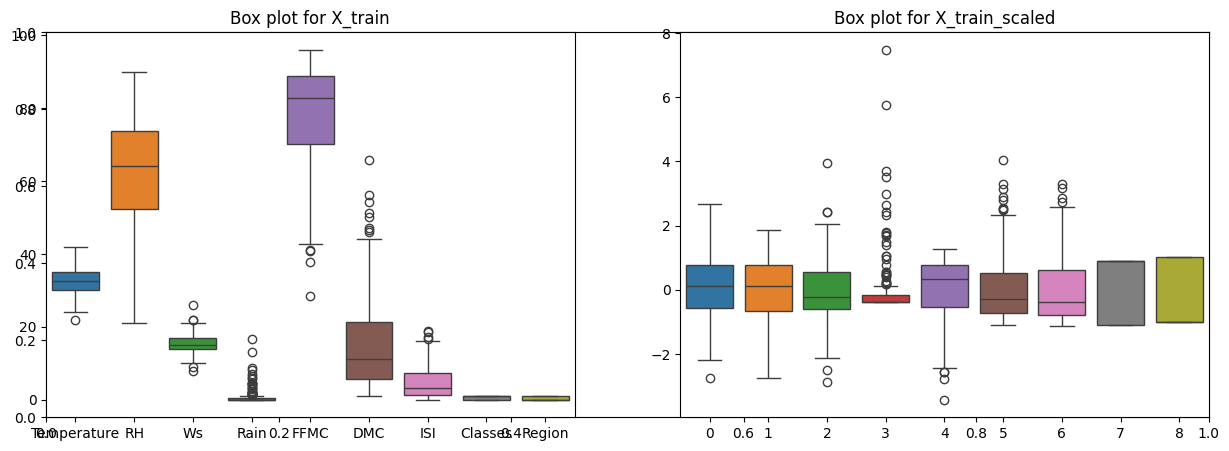

In [35]:
## Box plot for understanding the effect  of standardization
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Box plot for X_train')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('Box plot for X_train_scaled')

### Linear Regression model

Mean absolute error :  0.5468236465249978
R2 score :  0.9847657384266951


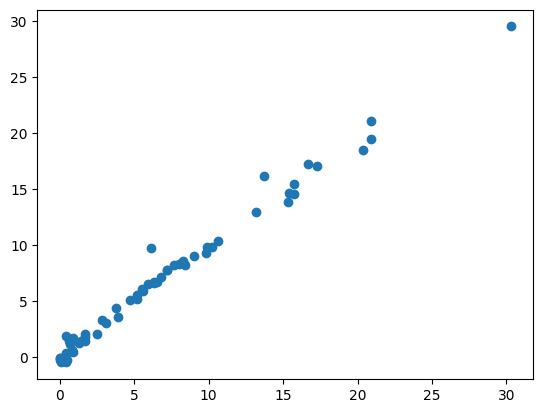

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,r2_score
y_pred = regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean absolute error : ',mae)
print('R2 score : ',r2)

plt.scatter(y_test,y_pred)

### Lasso Regression

Mean absolute error :  1.133175994914409
R2 score :  0.9492020263112388


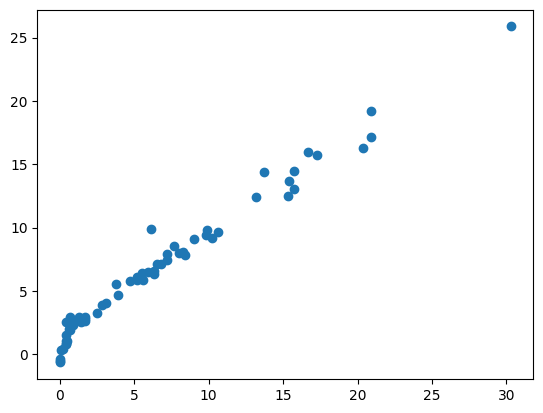

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,r2_score
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean absolute error : ',mae)
print('R2 score : ',r2)

plt.scatter(y_test,y_pred)

### Cross Validation Lasso

In [40]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train) 

LassoCV(cv=5)

Mean absolute error :  0.619970115826343
R2 score :  0.9820946715928275


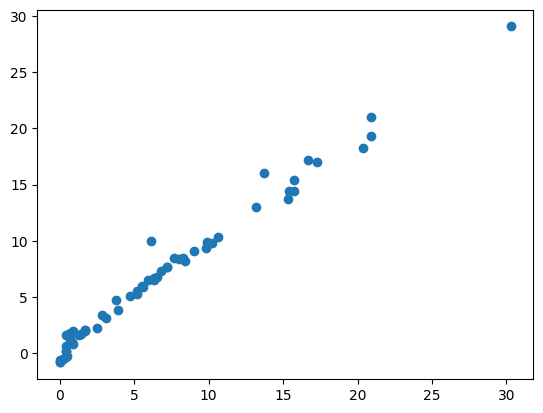

In [41]:
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean absolute error : ',mae)
print('R2 score : ',r2)

plt.scatter(y_test,y_pred)

### Ridge regression

Mean absolute error :  0.5642305340105715
R2 score :  0.9842993364555512


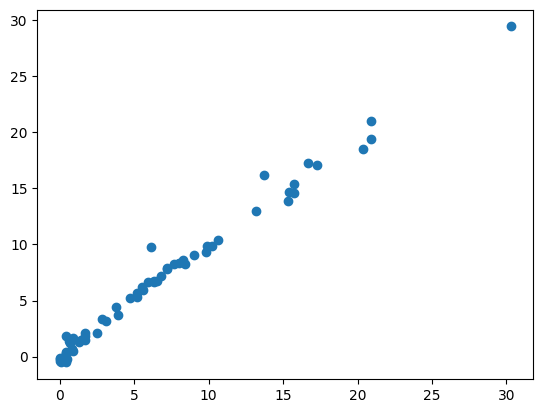

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,r2_score
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean absolute error : ',mae)
print('R2 score : ',r2)

plt.scatter(y_test,y_pred)

### Ridge Cross Validation

Mean absolute error :  0.5642305340105715
R2 score :  0.9842993364555512


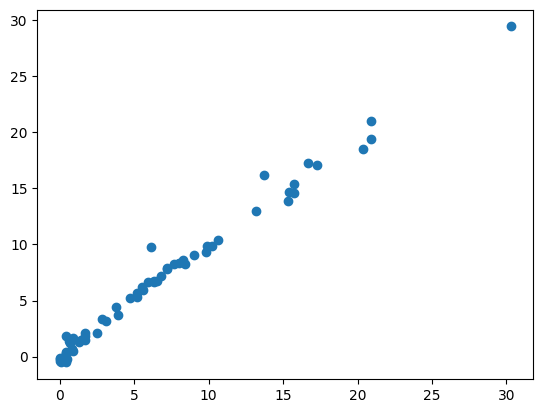

In [44]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,r2_score
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean absolute error : ',mae)
print('R2 score : ',r2)

plt.scatter(y_test,y_pred)

In [45]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### Elasticnet Regression

Mean absolute error :  1.8822353634896005
R2 score :  0.8753460589519703


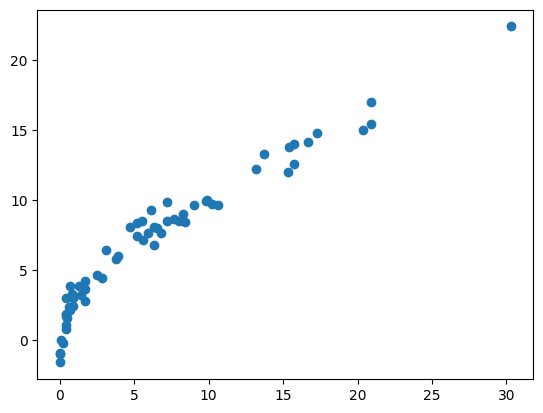

In [48]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,r2_score
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean absolute error : ',mae)
print('R2 score : ',r2)

plt.scatter(y_test,y_pred)

### Elasticnet cv

Mean absolute error :  0.6575946731430898
R2 score :  0.9814217587854941


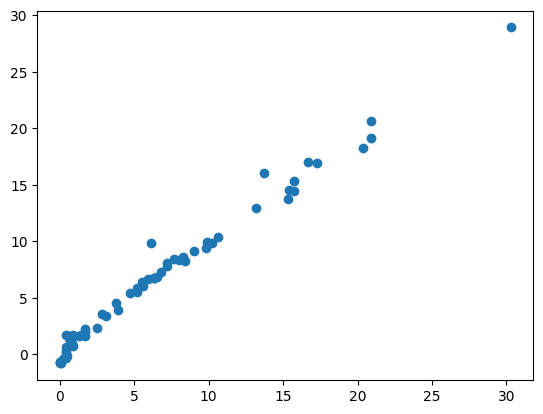

In [49]:
from sklearn.linear_model import ElasticNetCV
elasticNetcv = ElasticNetCV(cv=5)
elasticNetcv.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,r2_score
y_pred = elasticNetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean absolute error : ',mae)
print('R2 score : ',r2)

plt.scatter(y_test,y_pred)

### Pickle the machine learning model and preprocessing model standardScaler

In [54]:
ridge

Ridge()

In [51]:
scaler

StandardScaler()

In [55]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))